In [1]:
import pandas as pd

# Load the Titanic dataset (assuming the CSV file is named 'train.csv')
titanic_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check for missing values and data types
print(titanic_data.info())

# Check for statistical summary (numerical data)
print(titanic_data.describe())

# Check for missing values
print(titanic_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [3]:
# Fill missing 'Age' with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode (most frequent value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' if necessary (here, we check if it's missing)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Check again for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [4]:
# Convert 'Sex' to numeric (0 for male, 1 for female)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric (C -> 0, Q -> 1, S -> 2)
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the data after conversion
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [5]:
# Check and remove duplicates if any
titanic_data.drop_duplicates(inplace=True)

# Check the shape after removing duplicates
print(titanic_data.shape)


(891, 12)


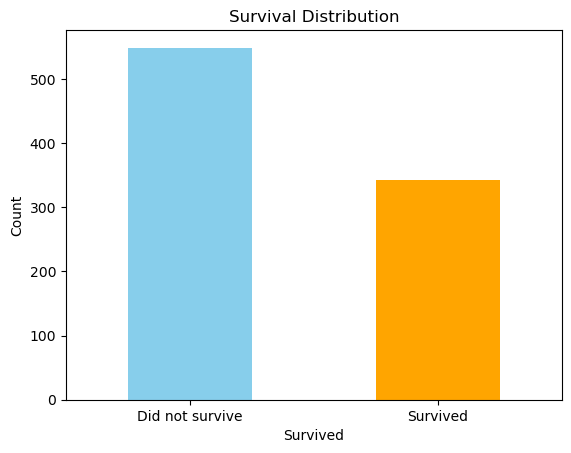

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of survival
titanic_data['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'], rotation=0)
plt.show()


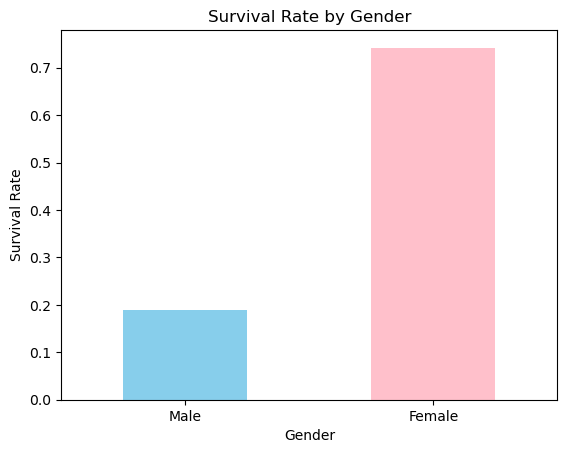

In [7]:
# Survival rate by Gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()

# Plot the survival rate by Gender
survival_by_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()


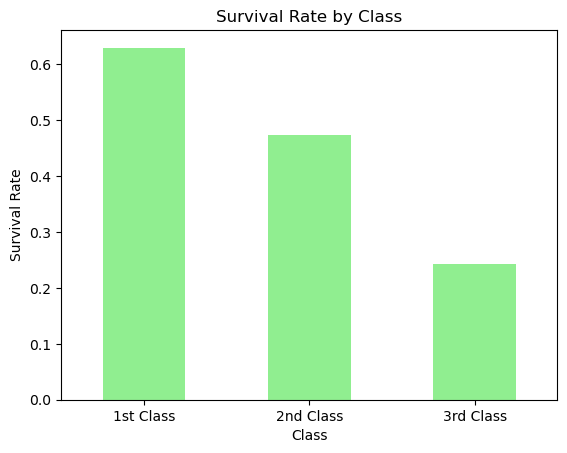

In [8]:
# Survival rate by Class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

# Plot the survival rate by Class
survival_by_class.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.show()


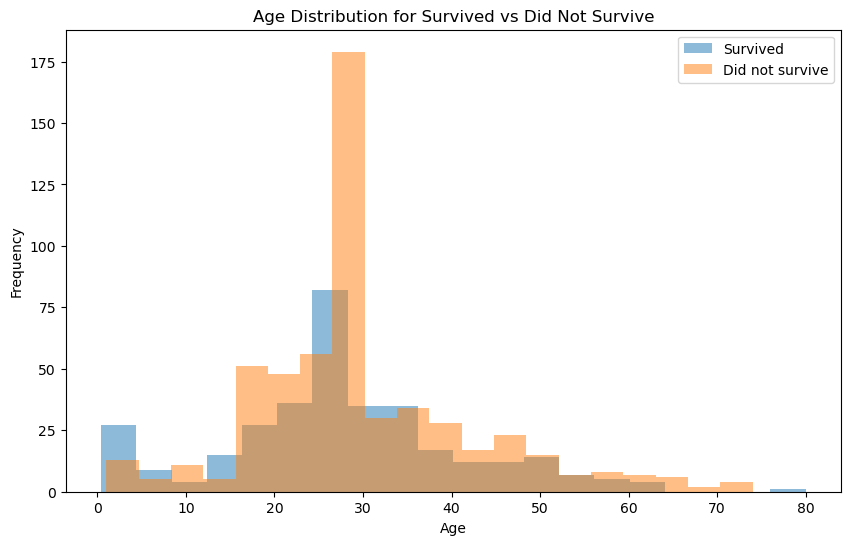

In [9]:
# Plot Age Distribution for Survived vs Did not Survive
plt.figure(figsize=(10, 6))
titanic_data[titanic_data['Survived'] == 1]['Age'].plot(kind='hist', alpha=0.5, bins=20, label='Survived')
titanic_data[titanic_data['Survived'] == 0]['Age'].plot(kind='hist', alpha=0.5, bins=20, label='Did not survive')
plt.title('Age Distribution for Survived vs Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


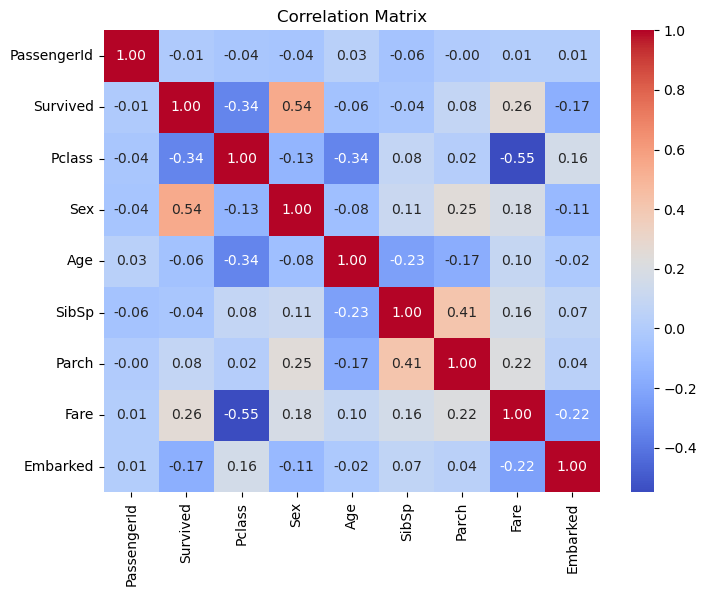

In [10]:
# Select only numeric columns from the dataset
numeric_data = titanic_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


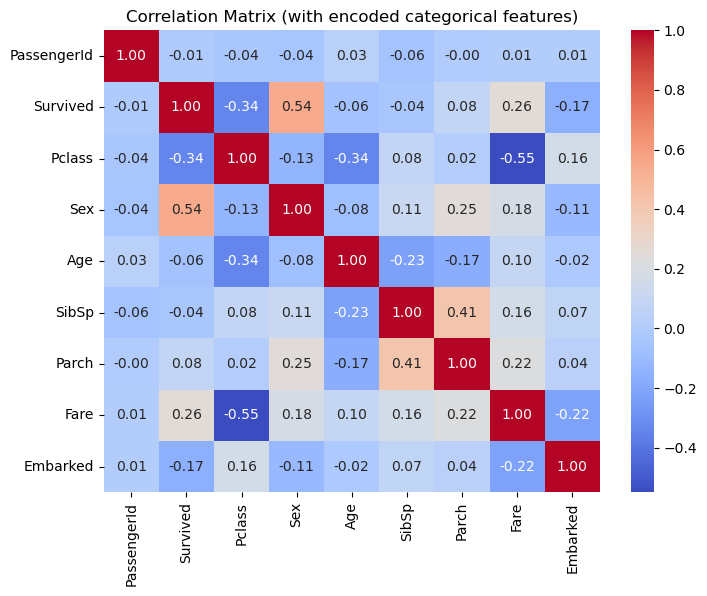

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].astype(str))

# Now, select only numeric columns again after encoding
numeric_data = titanic_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix again
correlation_matrix = numeric_data.corr()

# Plot the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix (with encoded categorical features)')
plt.show()
